In [8]:
# train_random_forest.py
#
# Train a Random Forest model for phishing URL detection
# Dataset format:
#   URL,Label
#   nobell.it/70ffb5...,bad
#   google.com,good
#   ...

import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==============================
# 1. SETTINGS – CHANGE THESE
# ==============================
DATA_PATH = "phishing_site_urls.csv"   # <-- your CSV file name
TEXT_COL  = "URL"                 # <-- column name with URL
LABEL_COL = "Label"               # <-- column name with label (good / bad)

# ==============================
# 2. LOAD DATA
# ==============================
print(f"📂 Loading dataset from: {DATA_PATH}")
df = pd.read_csv(DATA_PATH)

# Keep only needed columns and drop missing
df = df[[TEXT_COL, LABEL_COL]].dropna()
df[TEXT_COL] = df[TEXT_COL].astype(str)

print("✅ Dataset loaded.")
print("Shape:", df.shape)
print(df.head())

X = df[TEXT_COL]
y = df[LABEL_COL]

# Optional: show label distribution
print("\nLabel counts:")
print(y.value_counts())

# ==============================
# 3. TRAIN / TEST SPLIT
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # keep same good/bad ratio
)

print("\n🔀 Train size:", len(X_train))
print("🔀 Test size :", len(X_test))

# ==============================
# 4. TF-IDF VECTORIZER (CHAR N-GRAMS)
# ==============================
# Char n-grams work very well for URLs
vectorizer = TfidfVectorizer(
    analyzer="char",
    ngram_range=(3, 5),   # 3 to 5 character grams
    min_df=2              # ignore patterns that appear only once
)

print("\n🧠 Fitting vectorizer...")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

print("Vectorizer fitted.")
print("Train vector shape:", X_train_vec.shape)
print("Test vector shape :", X_test_vec.shape)

# ==============================
# 5. RANDOM FOREST MODEL
# ==============================
rf = RandomForestClassifier(
    n_estimators=400,     # number of trees
    max_depth=None,      # let trees grow deep
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1            # use all CPU cores
)

print("\n🌲 Training Random Forest model...")
rf.fit(X_train_vec, y_train)

# ==============================
# 6. EVALUATION
# ==============================
print("\n📊 Evaluating on test set...")
y_pred = rf.predict(X_test_vec)

acc = accuracy_score(y_test, y_pred)
print("\n========================")
print(f"✅ ACCURACY: {acc:.4f}")
print("========================\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# ==============================
# 7. SAVE MODEL + VECTORIZER
# ==============================
VEC_OUT   = "vectorizer_rf.pkl"
MODEL_OUT = "phishing_rf.pkl"

with open(VEC_OUT, "wb") as f:
    pickle.dump(vectorizer, f)

with open(MODEL_OUT, "wb") as f:
    pickle.dump(rf, f)

print(f"\n💾 Saved vectorizer to: {VEC_OUT}")
print(f"💾 Saved Random Forest model to: {MODEL_OUT}")
print("\n🎉 DONE.")


📂 Loading dataset from: phishing_site_urls.csv
✅ Dataset loaded.
Shape: (549346, 2)
                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad

Label counts:
Label
good    392924
bad     156422
Name: count, dtype: int64

🔀 Train size: 439476
🔀 Test size : 109870

🧠 Fitting vectorizer...
Vectorizer fitted.
Train vector shape: (439476, 1893708)
Test vector shape : (109870, 1893708)

🌲 Training Random Forest model...

📊 Evaluating on test set...

✅ ACCURACY: 0.9808

Classification Report:

              precision    recall  f1-score   support

         bad       0.99      0.94      0.97     31285
        good       0.98      1.00      0.99     78585

    accuracy                           0.98    10

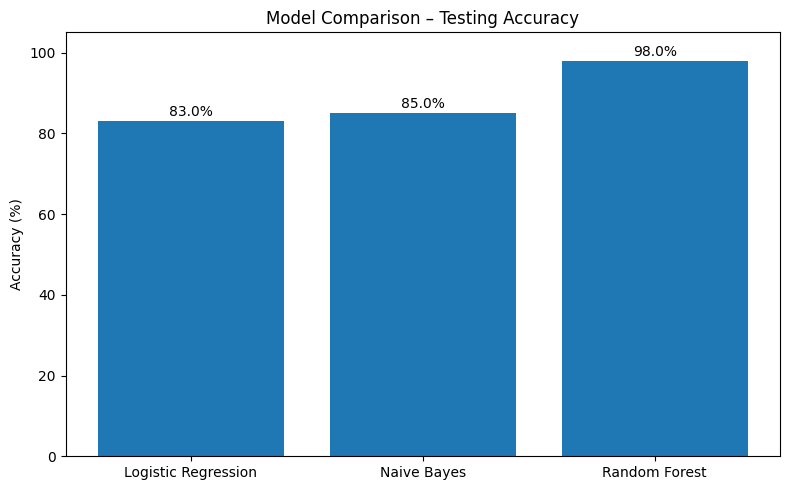

Saved: model_test_accuracy_comparison.png


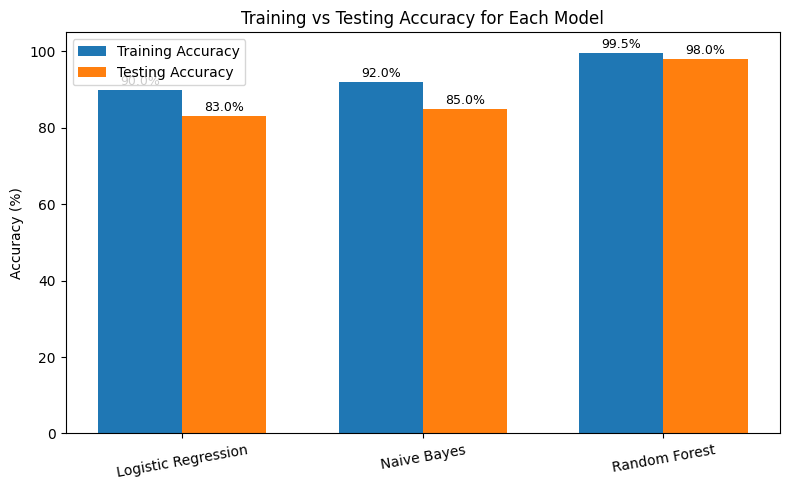

Saved: train_vs_test_accuracy.png


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# 1. ENTER YOUR ACCURACIES HERE
# ==========================================
# Edit these values with your real results

# Logistic Regression
lr_train_acc = 0.90   # example: 90% training
lr_test_acc  = 0.83   # example: 83% testing

# Multinomial Naive Bayes
mnb_train_acc = 0.92  # example
mnb_test_acc  = 0.85  # example

# Random Forest
rf_train_acc = 0.995  # example: 99.5% training
rf_test_acc  = 0.98   # example: 98% testing

# Convert to percentage for plotting
models = ["Logistic Regression", "Naive Bayes", "Random Forest"]
test_accuracies = [
    lr_test_acc * 100,
    mnb_test_acc * 100,
    rf_test_acc * 100,
]

train_accuracies = [
    lr_train_acc * 100,
    mnb_train_acc * 100,
    rf_train_acc * 100,
]

# ==========================================
# 2. SIMPLE MODEL COMPARISON (TEST ACCURACY)
# ==========================================
plt.figure(figsize=(8, 5))
bars = plt.bar(models, test_accuracies)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.title("Model Comparison – Testing Accuracy")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 105)

plt.tight_layout()
plt.savefig("model_test_accuracy_comparison.png", dpi=300)
plt.show()

print("Saved: model_test_accuracy_comparison.png")

# ==========================================
# 3. TRAIN vs TEST ACCURACY (GROUPED BAR)
# ==========================================
x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

plt.figure(figsize=(8, 5))
rects1 = plt.bar(x - width/2, train_accuracies, width, label="Training Accuracy")
rects2 = plt.bar(x + width/2, test_accuracies, width, label="Testing Accuracy")

# Add text labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(
            rect.get_x() + rect.get_width() / 2,
            height + 0.5,
            f"{height:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9,
        )

add_labels(rects1)
add_labels(rects2)

plt.ylabel("Accuracy (%)")
plt.title("Training vs Testing Accuracy for Each Model")
plt.xticks(x, models, rotation=10)
plt.ylim(0, 105)
plt.legend()

plt.tight_layout()
plt.savefig("train_vs_test_accuracy.png", dpi=300)
plt.show()

print("Saved: train_vs_test_accuracy.png")


In [2]:
# ==================================================================
#  SINGLE-CELL: NEW LOGISTIC REGRESSION MODEL (SEPARATE)
#  Creates:
#      vectorizer_lr_new.pkl
#      model_lr_new.pkl
#  Does NOT touch any old .pkl files.
# ==================================================================

import pandas as pd
import pickle
import re
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ------------------------------------------------------------------
# 1. CONFIG – change if your file/columns are different
# ------------------------------------------------------------------
DATA_PATH = "phishing_site_urls.csv"   # your CSV file
TEXT_COL  = "URL"                      # column with URL string
LABEL_COL = "Label"                    # column with 'good'/'bad' or 0/1

def clean_url(url: str) -> str:
    """URL normalization similar to Flask app: remove http/https, www, trailing /."""
    if not isinstance(url, str):
        return ""
    u = url.strip()
    u = re.sub(r"^https?://(www\.)?", "", u, flags=re.IGNORECASE)
    return u.rstrip("/")

# ------------------------------------------------------------------
# 2. LOAD + CLEAN DATA
# ------------------------------------------------------------------
print("📥 Loading dataset from:", DATA_PATH)
df = pd.read_csv(DATA_PATH)

# keep only needed columns and drop missing
df = df[[TEXT_COL, LABEL_COL]].dropna()
df[TEXT_COL] = df[TEXT_COL].astype(str)
df["clean_url"] = df[TEXT_COL].apply(clean_url)

X = df["clean_url"]
y = df[LABEL_COL]

print("✅ Dataset shape:", df.shape)
print("✅ Label counts:\n", y.value_counts())

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"🔀 Train size: {len(X_train)}")
print(f"🔀 Test size : {len(X_test)}")

# ------------------------------------------------------------------
# 3. PIPELINE: TF-IDF (char) + Logistic Regression
# ------------------------------------------------------------------
lr_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(analyzer="char")),
    ("clf", LogisticRegression(max_iter=2000, solver="liblinear"))
])

# Big-ish grid → will take time (good for overnight)
param_grid_lr = {
    "tfidf__ngram_range": [(3, 4), (3, 5)],
    "tfidf__min_df": [1, 2],
    "clf__C": [0.5, 1.0, 2.0],
    "clf__penalty": ["l1", "l2"],
}

print("\n🚀 Starting GridSearchCV for Logistic Regression (this may take a long time)...")
start = time.time()

grid_lr = GridSearchCV(
    lr_pipe,
    param_grid_lr,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid_lr.fit(X_train, y_train)

end = time.time()
print(f"\n⏳ GridSearch finished in {(end - start)/60:.2f} minutes")
print("✅ Best LR parameters:\n", grid_lr.best_params_)

best_lr_pipeline = grid_lr.best_estimator_

# ------------------------------------------------------------------
# 4. EVALUATION
# ------------------------------------------------------------------
print("\n📊 Evaluating best LR model on test set...")
y_pred = best_lr_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("\n==============================")
print(f"🎯 NEW LR TEST ACCURACY: {acc:.4f}")
print("==============================\n")

print("📄 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ------------------------------------------------------------------
# 5. SAVE SEPARATE PKL FILES
# ------------------------------------------------------------------
best_vec = best_lr_pipeline.named_steps["tfidf"]
best_clf = best_lr_pipeline.named_steps["clf"]

with open("vectorizer_lr_new.pkl", "wb") as f:
    pickle.dump(best_vec, f)

with open("model_lr_new.pkl", "wb") as f:
    pickle.dump(best_clf, f)

print("\n💾 Saved new Logistic Regression model as:")
print("   vectorizer_lr_new.pkl")
print("   model_lr_new.pkl")
print("\n🎉 DONE – you can now integrate these later like your RF model.")


📥 Loading dataset from: phishing_site_urls.csv
✅ Dataset shape: (549346, 3)
✅ Label counts:
 Label
good    392924
bad     156422
Name: count, dtype: int64
🔀 Train size: 439476
🔀 Test size : 109870

🚀 Starting GridSearchCV for Logistic Regression (this may take a long time)...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

⏳ GridSearch finished in 44.65 minutes
✅ Best LR parameters:
 {'clf__C': 2.0, 'clf__penalty': 'l2', 'tfidf__min_df': 2, 'tfidf__ngram_range': (3, 5)}

📊 Evaluating best LR model on test set...

🎯 NEW LR TEST ACCURACY: 0.9789

📄 Classification Report:
               precision    recall  f1-score   support

         bad       0.98      0.94      0.96     31285
        good       0.98      0.99      0.99     78585

    accuracy                           0.98    109870
   macro avg       0.98      0.97      0.97    109870
weighted avg       0.98      0.98      0.98    109870

📉 Confusion Matrix:
 [[29533  1752]
 [  565 78020]]

💾 Saved new Logistic Regressi